In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle

%matplotlib inline

## Read dataset

In [2]:
data = pd.read_csv('../models/.contours-data.csv')

In [3]:
data.head()

,bbox_width,bbox_height,area,extent,perimeter,num_chars
0,38.0,38.0,359.0,0.248615,211.480229,2.0
1,66.0,34.0,1134.0,0.505348,323.906634,3.0
2,18.0,12.0,68.5,0.317130,47.213203,0.0
3,9.0,12.0,59.0,0.546296,34.485281,0.0
4,4.0,7.0,6.5,0.232143,16.242641,0.0


In [4]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 6 columns):
bbox_width     735 non-null float64
bbox_height    735 non-null float64
area           735 non-null float64
extent         735 non-null float64
perimeter      735 non-null float64
num_chars      735 non-null float64
dtypes: float64(6)
memory usage: 34.5 KB


In [5]:
data.describe()

,bbox_width,bbox_height,area,extent,perimeter,num_chars
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,36.191837,27.447619,484.308844,0.404307,174.069060,1.512925
std,29.014465,11.765055,459.709565,0.085824,140.839116,1.341858
min,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,14.000000,22.000000,130.000000,0.342906,68.819805,1.000000
50%,26.000000,31.000000,359.500000,0.403241,129.982755,1.000000
75%,51.000000,35.000000,705.500000,0.463746,254.036577,2.000000
max,142.000000,50.000000,2223.500000,0.753472,716.541190,5.000000


In [27]:
data.groupby('num_chars').size()

num_chars
0.0    181
1.0    256
2.0    139
3.0     85
4.0     47
5.0     27
dtype: int64

In [7]:
null_frames = data[data['num_chars'] == 0]

In [8]:
null_frames[['bbox_width', 'bbox_height', 'area']].mean()

bbox_width      7.596685
bbox_height     9.265193
area           29.544199
dtype: float64

In [9]:
char_frames_1 = data[data['num_chars'] == 1]

In [10]:
char_frames_1[['bbox_width', 'bbox_height', 'area']].mean()

bbox_width      23.519531
bbox_height     30.609375
area           292.769531
dtype: float64

In [11]:
char_frames_2 = data[data['num_chars'] == 2]

In [12]:
char_frames_2[['bbox_width', 'bbox_height', 'area']].mean()

bbox_width      44.496403
bbox_height     34.388489
area           606.327338
dtype: float64

In [13]:
X = data[['bbox_width', 'bbox_height', 'area', 'extent', 'perimeter']]

In [14]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)

## Preprocess data 

In [15]:
y = data['num_chars'].values.astype(np.uint8)

## Define train & test sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.2)

## Create the estimator 

In [17]:
model = SVC(gamma='auto', C=1.2, probability=True)

## Apply cross validation

In [18]:
results = cross_validate(model, X, y, cv=RepeatedStratifiedKFold(4, 10), return_train_score=True, scoring=['accuracy'])

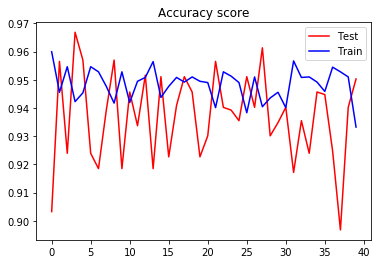

In [19]:
plt.plot(results['test_accuracy'], color='red')
plt.plot(results['train_accuracy'], color='blue')
plt.title('Accuracy score')
plt.legend(['Test', 'Train'])

## Evaluate the model on test set

In [20]:
model.fit(X_train, y_train)

SVC(C=1.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [22]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.93      0.98      0.95        51
           2       0.88      0.82      0.85        28
           3       0.78      0.82      0.80        17
           4       0.88      0.70      0.78        10
           5       1.00      1.00      1.00         5

   micro avg       0.92      0.92      0.92       147
   macro avg       0.91      0.89      0.90       147
weighted avg       0.92      0.92      0.92       147



In [23]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       145
           1       0.98      0.98      0.98       205
           2       0.91      0.95      0.93       111
           3       0.91      0.87      0.89        68
           4       0.89      0.89      0.89        37
           5       0.95      0.95      0.95        22

   micro avg       0.96      0.96      0.96       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.96      0.96      0.96       588



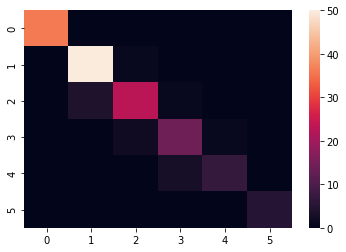

In [24]:
sns.heatmap(confusion_matrix(y_test, y_test_pred))

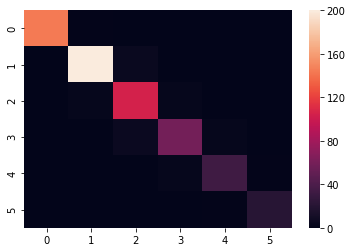

In [25]:
sns.heatmap(confusion_matrix(y_train, y_train_pred))

## Save the model

In [26]:
with open('../models/.contour-classifier', 'wb') as file:
    pickle.dump(model, file)
    
with open('../models/.contour-classifier-preprocessor', 'wb') as file:
    pickle.dump(std_scaler, file)